## Import modules

In [1]:
import pandas as pd
import re

## Set display options

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

import warnings
warnings.filterwarnings('ignore')

## Load data

In [3]:
url = "https://drive.google.com/file/d/1N2BR7RENmubj7E7nBn6k6XEE8hPDtlcV/view?usp=share_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

## Get sorted list of n most common types

In [4]:
n = 30
top_types = products.groupby("type", as_index=False).count().nlargest(n, "sku")["type"].to_list()

## Display products of each type to determine category

In [5]:
idx = 24
print(f"Type: {top_types[idx]}, Count: {products.loc[products['type'] == top_types[idx], 'sku'].count()}")
products.loc[products["type"] == top_types[idx]].sample(50)

Type: 2449, Count: 107


,sku,name,desc,price,in_stock,type
5605,APP1790,Apple Correa 38mm Sports Blue Ocean,Durable and flexible strap sports with clip closure for Apple Watch 38mm,59.00,0,2449
3638,BAN0016,Force Band & Strap 42mm Apple Watch Strap Black,Fabric strap for easy installation Apple Watch 42mm.,69.00,0,2449
2328,XDO0017,X-Doria Lux Apple Watch Strap Black 38mm,Leather strap for easy installation Apple Watch.,30.99,0,2449
8257,ICA0083,Incase Leather Strap Band Apple Watch 38mm brown,Genuine leather strap with stainless steel buckle Apple Watch 38 mm,59.95,0,2449
7918,APP2104,Apple Correa 38mm Deportiva Rosa Flamenco,Durable and flexible strap sports lockable clip Apple Watch 38mm,59.00,0,2449
5621,APP1796,Apple Strap Orange 38mm Braiding Nailon Space / Anthracite,Braided nylon strap with four layers of tissue for Apple Watch 38 mm,59.00,0,2449
8258,ICA0087,Incase Nylon Nato Strap 42mm Red Apple Watch,Nylon belt finish and adjustable buckle anodized aluminum Apple Watch 42 mm,39.95,1,2449
5613,APP1803,Apple Classic buckle strap 38mm Blue Sea,Apple strap classic design with calfskin tone for Apple Watch 38 mm,159.00,0,2449
5622,APP1797,Apple Correa 38mm Braiding Nailon Pale Pink / Blue Night,Braided nylon strap with four layers of tissue for Apple Watch 38 mm,59.00,0,2449
7140,HOC0014,Hoco Milanese Edition Apple Watch Strap 42mm Silver,Stainless steel strap silver Hoco for Apple Watch 42mm,89.00,0,2449


## Categorize types

In [9]:
# 1. Accessories
accessories = ['11865403', '1298', '12635403', '13835403', '12585395', '1325', '2449', '13615399', '13555403', '1229', '1515', ]

# 2. Hard drives
hard_drives = ['11935397', '1364', '1433', '12215397', '12655397', '57445397']

# 3. Computers
computers = ['1282', '5,74E+15', '1,02E+12', '2158']

# 4. Internet
internet = ['12175397', '1334', '12995397']

# 5. Repair services
repair_services = ['1,44E+11']

# 6. Gadgets
gadgets = ['11905404']

# 7. Tablets
tablets = ['1405']

# 8. Monitors
monitors = ['1296']

# 9. Audio
audio = ['5384', '5398']



## Extra categories
# 11. iPhones
iphone_regex = re.compile(r"Apple iPhone .{1,2} .*", flags=re.IGNORECASE)
iphones = products.loc[products.name.str.contains(iphone_regex, regex=True), "type"].unique().tolist()

# iPads --> goes into tablets
ipad_regex = re.compile(r"^(?!.*\b(Case|Cover)\b)(?=.*\bApple iPad\b).+$", flags=re.IGNORECASE)
ipads = products.loc[products.name.str.contains(ipad_regex, regex=True), "type"].unique().tolist()
tablets += ipads 

# Keyboards and Mice
keyboard_mice_regex = re.compile(r".*(keyboard|mouse).*", flags=re.IGNORECASE)
keyboard_mice = products.loc[products.name.str.contains(keyboard_mice_regex, regex=True), "type"].unique().tolist()
accessories += keyboard_mice


## Add categories to products data frame

In [10]:
products["category"] = ""

products.loc[products["type"].isin(accessories), "category"] = "Accessories"
products.loc[products["type"].isin(hard_drives), "category"] = "Hard drives"
products.loc[products["type"].isin(computers), "category"] = "Computers"
products.loc[products["type"].isin(internet), "category"] = "Internet"
products.loc[products["type"].isin(repair_services), "category"] = "Repair services"
products.loc[products["type"].isin(gadgets), "category"] = "Gadgets"
products.loc[products["type"].isin(tablets), "category"] = "Tablets"
products.loc[products["type"].isin(monitors), "category"] = "Monitors"
products.loc[products["type"].isin(audio), "category"] = "Audio"
products.loc[products["type"].isin(iphones), "category"] = "iPhones"

products.loc[products["category"] == "", "category"] = "Other"

products["category"].value_counts()


iPhones        2119
Accessories    1692
Other          1531
Hard drives    1428
Internet       1318
Computers       887
Tablets         501
Gadgets         472
Audio           341
Monitors        188
Name: category, dtype: int64

## Create recycling categories


In [11]:
products["state"] = "New"

recycling_regex = re.compile(r"^(?=.*\b(Open|Like new|refurbished|reconditioned|second hand)\b).+$", flags=re.IGNORECASE)
products.loc[products.name.str.contains(recycling_regex, regex=True) | products.desc.str.contains(recycling_regex, regex=True), "state"] = "Refurbished"

products["state"].value_counts()

New            8798
Refurbished    1679
Name: state, dtype: int64

## Create price categories


In [12]:
products["price category"] = pd.cut(products.price, [0, 100, 1000, 20000], labels=["Low", "Medium", "High"])

products["price category"].value_counts()

Low       5246
Medium    3354
High      1877
Name: price category, dtype: int64

## Plot pie charts

<Axes: ylabel='None'>

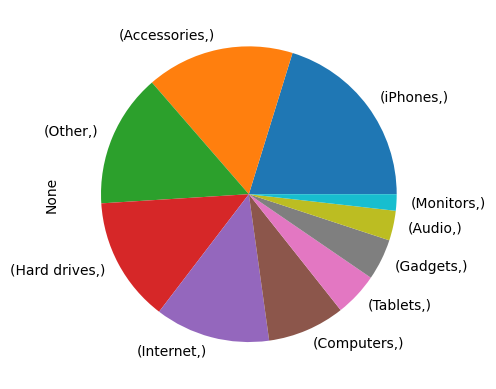

In [13]:
# Product categories


<Axes: ylabel='None'>

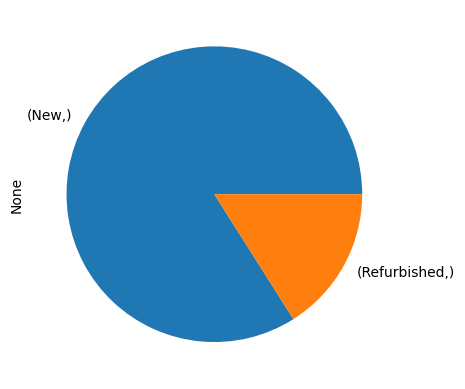

In [14]:
# State
state_counts = products[["state"]].value_counts()
state_counts.plot.pie()

In [16]:
# Price categories
price_counts = products[["price category"]].value_counts()
price_counts

price category
Low               5246
Medium            3354
High              1877
dtype: int64